=== Exercício 2A: Dataset Básico ===
Tamanho do dataset: 100
Primeira amostra: (tensor([3.8538]), tensor([8.7803]))


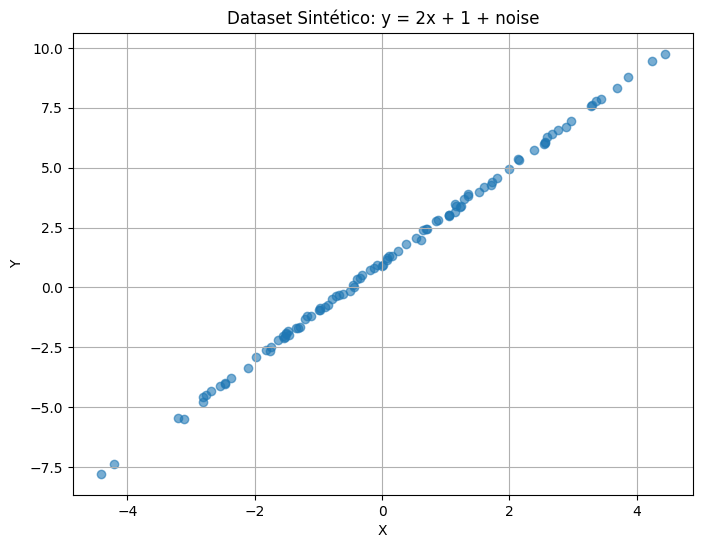


=== Exercício 2B: Com Transformação ===
Original: x=3.854, y=8.780
Transformado: x=7.708, y=4.390

=== Exercício 2C: DataLoader ===
Batch 0: x.shape=torch.Size([10, 1]), y.shape=torch.Size([10, 1])
Batch 1: x.shape=torch.Size([10, 1]), y.shape=torch.Size([10, 1])
Batch 2: x.shape=torch.Size([10, 1]), y.shape=torch.Size([10, 1])


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt

# Classe Dataset personalizada para dados sintéticos
class SyntheticDataset(Dataset):
    def __init__(self, num_samples=1000, noise=0.1, transform=None):
        self.num_samples = num_samples
        self.transform = transform

        # Gerar dados sintéticos: y = 2x + 1 + noise
        torch.manual_seed(42)
        self.x = torch.randn(num_samples, 1) * 2
        self.y = 2 * self.x + 1 + torch.randn(num_samples, 1) * noise

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        sample = (self.x[idx], self.y[idx])
        if self.transform:
            sample = self.transform(sample)
        return sample

# Transformação personalizada
class ScaleTransform:
    def __init__(self, scale_x=1.0, scale_y=1.0):
        self.scale_x = scale_x
        self.scale_y = scale_y

    def __call__(self, sample):
        x, y = sample
        x = x * self.scale_x
        y = y * self.scale_y
        return x, y

# Teste do dataset
print("=== Exercício 2A: Dataset Básico ===")
dataset = SyntheticDataset(num_samples=100)
print(f"Tamanho do dataset: {len(dataset)}")
print(f"Primeira amostra: {dataset[0]}")

# Visualização
x_data = [dataset[i][0].item() for i in range(len(dataset))]
y_data = [dataset[i][1].item() for i in range(len(dataset))]

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Sintético: y = 2x + 1 + noise')
plt.grid(True)
plt.show()

# Teste com transformação
print("\n=== Exercício 2B: Com Transformação ===")
transform = ScaleTransform(scale_x=2.0, scale_y=0.5)
dataset_transformed = SyntheticDataset(num_samples=100, transform=transform)

x_orig, y_orig = dataset[0]
x_trans, y_trans = dataset_transformed[0]
print(f"Original: x={x_orig.item():.3f}, y={y_orig.item():.3f}")
print(f"Transformado: x={x_trans.item():.3f}, y={y_trans.item():.3f}")

# DataLoader
print("\n=== Exercício 2C: DataLoader ===")
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for batch_idx, (batch_x, batch_y) in enumerate(dataloader):
    print(f"Batch {batch_idx}: x.shape={batch_x.shape}, y.shape={batch_y.shape}")
    if batch_idx == 2:
        break